In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns

In [18]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Box Plot

* Task 4 - Generate Descriptive Statistics and Visualizations
1. For the "Median value of owner-occupied homes" provide a boxplot

This boxplot displays the distribution of the Median Value of Owner-Occupied Homes. It shows the minimum value, first quartile, median, third quartile, and maximum values of the data. As you can see, the minimum value is under $10,000. 
The median value is just above \$20,000. and the maximum value is around $50,000. About hald of the values are between \$15,000 and $25,000.

Text(0, 0.5, 'MEDV ($1000s)')

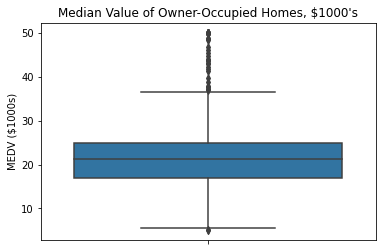

In [17]:
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title("Median Value of Owner-Occupied Homes, $1000's")
ax.set_ylabel('MEDV ($1000s)')

* 2. Provide a histogram for the Charles river variable

This plot shows how many how many houses are along the Charles River and how many are not. On the x-axis, '0' category is homes NOT bounding the river, and '1' category is homes bounding the river.

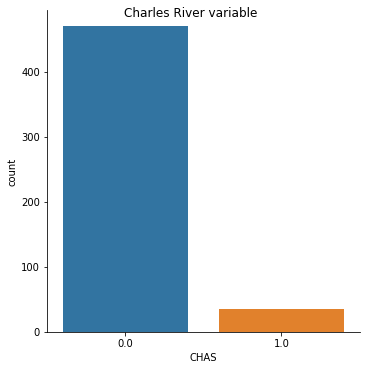

In [19]:
ax = sns.catplot(x='CHAS', kind='count', data=boston_df).fig.suptitle('Charles River variable')

(array([471.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  35.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

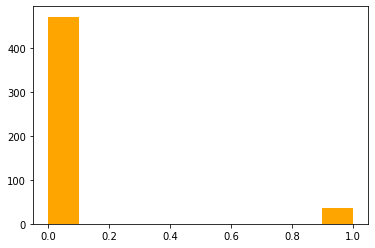

In [8]:
pyplot.hist(boston_df['CHAS'], color='orange')

* 3. Boxplot for the MEDV variable vs the AGE variable

This box plot shows the Median value of owner-occupied homes for three groups - homes 40 years old and younger, homes between 40 and 57 years, and homes older than 57 years. On average, newer homes are worth more. However, the maximum home price is similar for all three categories.

In [20]:
#Boxplot MEDV variable vs AGE variable

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'



Text(0, 0.5, 'Age Group')

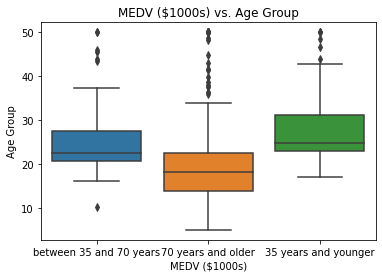

In [22]:
ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df)
ax.set_title("MEDV ($1000s) vs. Age Group")
ax.set_xlabel('MEDV ($1000s)')
ax.set_ylabel('Age Group')

* 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

This plot displays the relationship between two continuous dat, Nitric Oxide concentration and Non-retail business acres per town. As you can see, there seems to be a positive linear correlation between the variables. This is shown by upward and to the right trend in the plot.

Text(0.5, 1.0, 'Proportion of non-retail business acres per town vs. NOx Concentration')

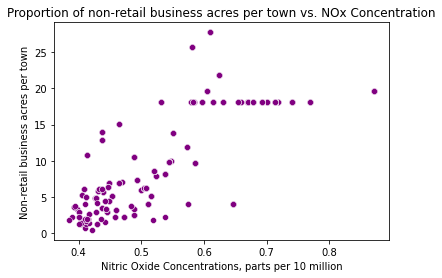

In [24]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df, color = 'purple')
ax.set_xlabel('Nitric Oxide Concentrations, parts per 10 million')
ax.set_ylabel('Non-retail business acres per town')
ax.set_title('Proportion of non-retail business acres per town vs. NOx Concentration')

* 5. Create a histogram for the pupil to teacher ratio variable

This plot shows all of the Pupil to Teacher ratios along the x-axis and the frequency of each ratio. The data does not follow normal distribution

Text(0.5, 1.0, 'Histogram of Pupil to Teacher Ratio')

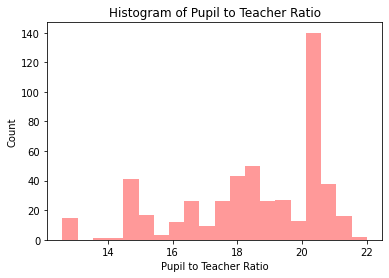

In [25]:
#Histogram pupil to teacher ratio variable

ax = sns.distplot(boston_df['PTRATIO'],bins=20, kde=False, color='red')
ax.set_xlabel('Pupil to Teacher Ratio')
ax.set_ylabel('Count')
ax.set_title('Histogram of Pupil to Teacher Ratio')

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

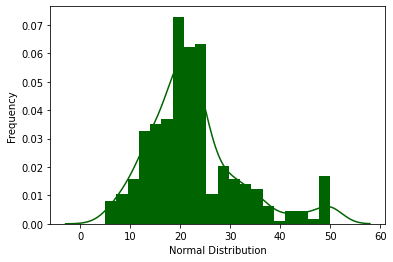

In [13]:
#Is there a significant difference in median value of houses bounded by the Charles river or not
import scipy.stats

ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='darkgreen',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

* Task 5 - Use the appropriate tests to answer the questions provided.
1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

[Math Processing Error] ("there is no difference in median value for houses bounded by the Charles River or not")
[Math Processing Error] ("there is a difference in median value for houses bounded by the Charles River or not")

In [26]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'], boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in meadian house value based on whether the property bounds the Charles River.

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

First, we group the data into categories as the one-way ANOVA can't work with continuous variable. We will create a new column for this newly assigned group. Our categories will be proportion of owner occupied units built prior to 1940 (AGE) values that are:

55 or less
between 55 and 90
90 or greater
These three categories are approximately the same size as eachother.

In [27]:
boston_df.loc[(boston_df['AGE'] <= 55), 'age_group'] = '55 or less'
boston_df.loc[(boston_df['AGE'] > 55)&(boston_df['AGE'] < 90), 'age_group'] = 'between 55 and 90'
boston_df.loc[(boston_df['AGE'] >= 90), 'age_group'] = '90 or higher'

State the hypothesis

[Math Processing Error] (the three population means are equal)
[Math Processing Error] At least one of the means differ
Separate the three samples (one for each AGE category) into a variable each.

In [28]:
lower = boston_df[boston_df['age_group'] == '55 or less']['MEDV']
middle = boston_df[boston_df['age_group'] == 'between 55 and 90']['MEDV']
higher = boston_df[boston_df['age_group'] == '90 or higher']['MEDV']
print(higher)

7      27.1
8      16.5
10     15.0
20     13.6
22     15.2
       ... 
488    15.2
489     7.0
490     8.1
491    13.6
503    23.9
Name: MEDV, Length: 170, dtype: float64


Now, run a one-way ANOVA.

In [29]:
f_statistic, p_value = scipy.stats.f_oneway(lower, middle, higher)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 41.80540024741085, P-Value: 1.600698198719595e-17


Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

[Math Processing Error] Nitric Oxide concentration is not correlated with proportion of non-retail business acres per town
[Math Processing Error] Nitric Oxide concentration is correlated with proportion of non-retail business acres per town
Since they are both continuous variables we can use a pearson correlation test

In [30]:
scipy.stats.pearsonr(boston_df['MEDV'],boston_df['NOX'])

(-0.4273207723732824, 7.06504158625191e-24)

Conclusion: Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between nitric oxide concentration and proportion of non-retail business acres per town.

4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis:

[Math Processing Error] = 0 (DIS has no effect on MEDV)
[Math Processing Error] is not equal to 0 (DIS has an effect on MEDV)

In [33]:
import statsmodels.api as sm

## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           1.21e-08
Time:                        10:37:11   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in MEDV based on DIS. The coefficient is 1.0916, which means that for each increase of 1 to the BIS value, the MEDV value increases by 1.0916 (representing a $1091.60 increase on MEDV).